# Amelia's Single-cell experiment - get clonality information

## Load in libraries

In [1]:
import scanpy as sc
import dandelion as ddl

sc.logging.print_header()

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/pyth

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [2]:
ddl.logging.print_header()

dandelion==0.3.3.dev39 pandas==2.1.0 numpy==1.24.4 matplotlib==3.7.1 networkx==3.1 scipy==1.11.2


## Read in the files

In [3]:
tdata = sc.read_h5ad("write/adata_with_tcr_tnk.h5ad")

In [4]:
tdata

AnnData object with n_obs × n_vars = 5546 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

## Read in VDJ data

In [5]:
vdj = ddl.read_h5ddl("write/tcr_data.h5ddl")
vdj

Dandelion class object with n_obs = 4605 and n_contigs = 7776
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junctio

### Subset to only cells within the TNK object

In [6]:
vdj = vdj[vdj.metadata_names.isin(tdata.obs_names)].copy()
vdj

Dandelion class object with n_obs = 3746 and n_contigs = 6640
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junctio

### Find clones and populate the other information

In [7]:
ddl.tl.find_clones(
    vdj, identity=1, key="junction"
)  # complete CDR3 identity at the nucleotide level
ddl.tl.clone_size(vdj)
ddl.tl.clone_size(vdj, max_size=5)
vdj.update_plus(option="all")

Finding clones based on abT cell VDJ chains : 100%|██████████| 229/229 [00:00<00:00, 7535.66it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 3746/3746 [00:00<00:00, 824207.25it/s]


In [8]:
# transfer back to tdata object
ddl.tl.transfer(tdata, vdj, overwrite=True)

In [9]:
# subset to just cells with TCR info
tdata = tdata[~tdata.obs["chain_status"].isin(["No_contig"])].copy()
tdata

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


AnnData object with n_obs × n_vars = 3746 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categ

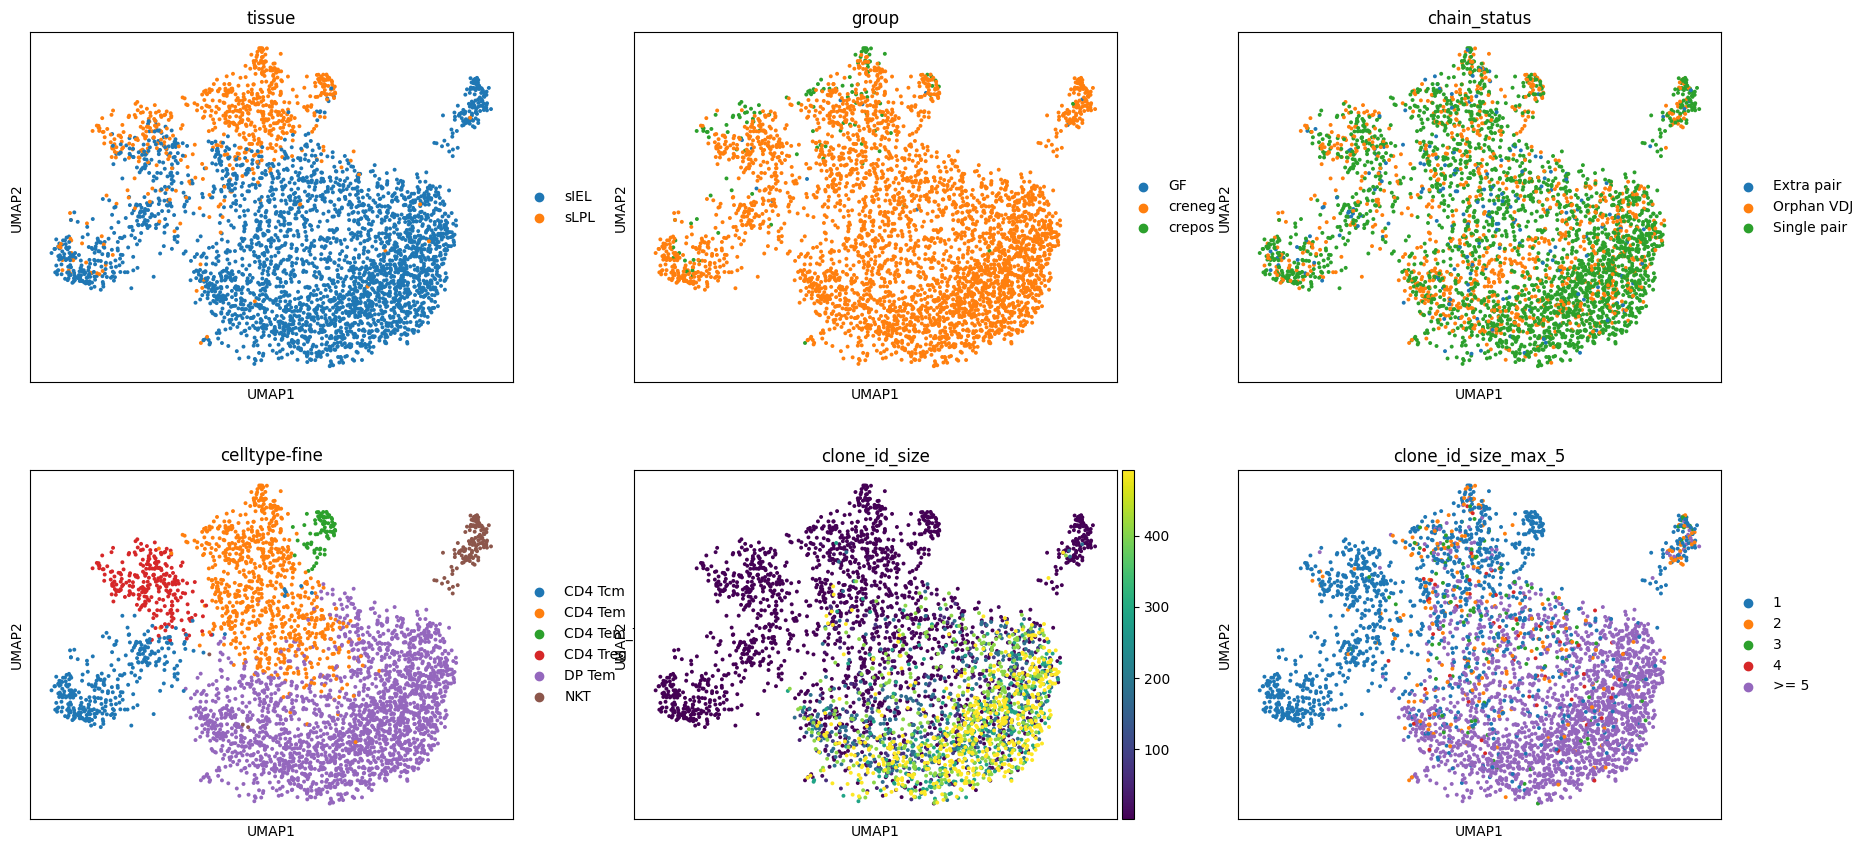

In [10]:
sc.pl.umap(
    tdata,
    color=[
        "tissue",
        "group",
        "chain_status",
        "celltype-fine",
        "clone_id_size",
        "clone_id_size_max_5",
    ],
    ncols=3,
)

In [11]:
# create a new column that encompases the group, tissue and celltype-fine
from tools import combine_two_categories

combine_two_categories(tdata, "tissue", "celltype-fine")
combine_two_categories(tdata, "group", "celltype-fine")
combine_two_categories(tdata, "group", "tissue_celltype-fine")

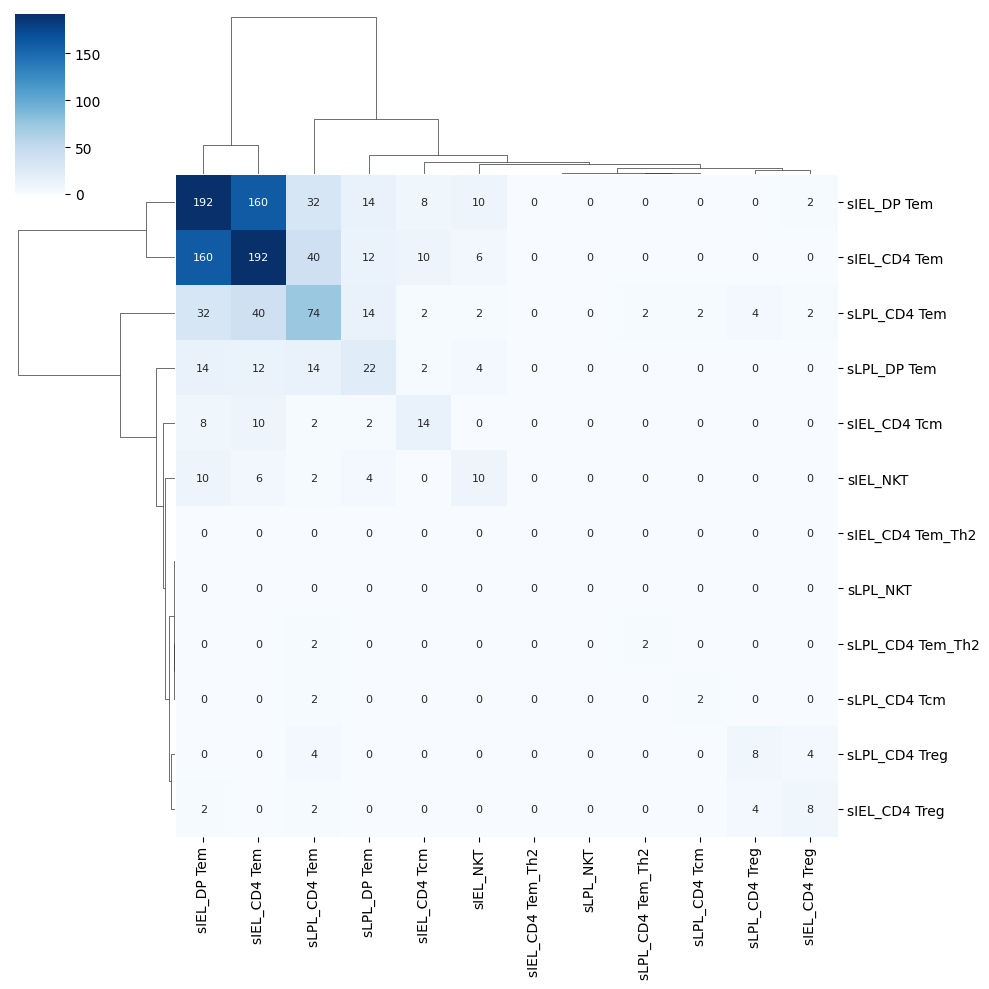

In [13]:
ddl.tl.clone_overlap(tdata, groupby="tissue_celltype-fine")
ddl.pl.clone_overlap(
    tdata,
    groupby="tissue_celltype-fine",
    weighted_overlap=True,
    as_heatmap=True,
    cmap="Blues",
    annot=True,
    figsize=(10, 10),
    annot_kws={"size": 8},
    fmt="g",
)

/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/plotting/_plotting.py:1013: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


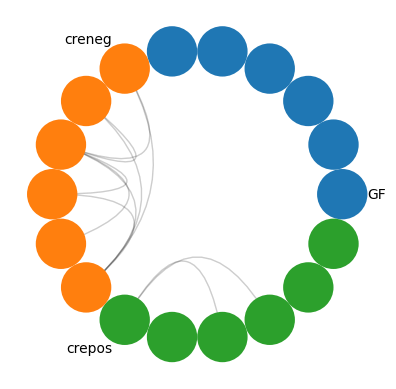

In [14]:
ddl.tl.clone_overlap(tdata, groupby="group_celltype-fine")
ddl.pl.clone_overlap(
    tdata,
    groupby="group_celltype-fine",
    colorby="group",
    # weighted_overlap=True,
    # as_heatmap=True,
    # cmap="Blues",
    # annot=True,
    figsize=(20, 20),
    # annot_kws={"size": 8},
)

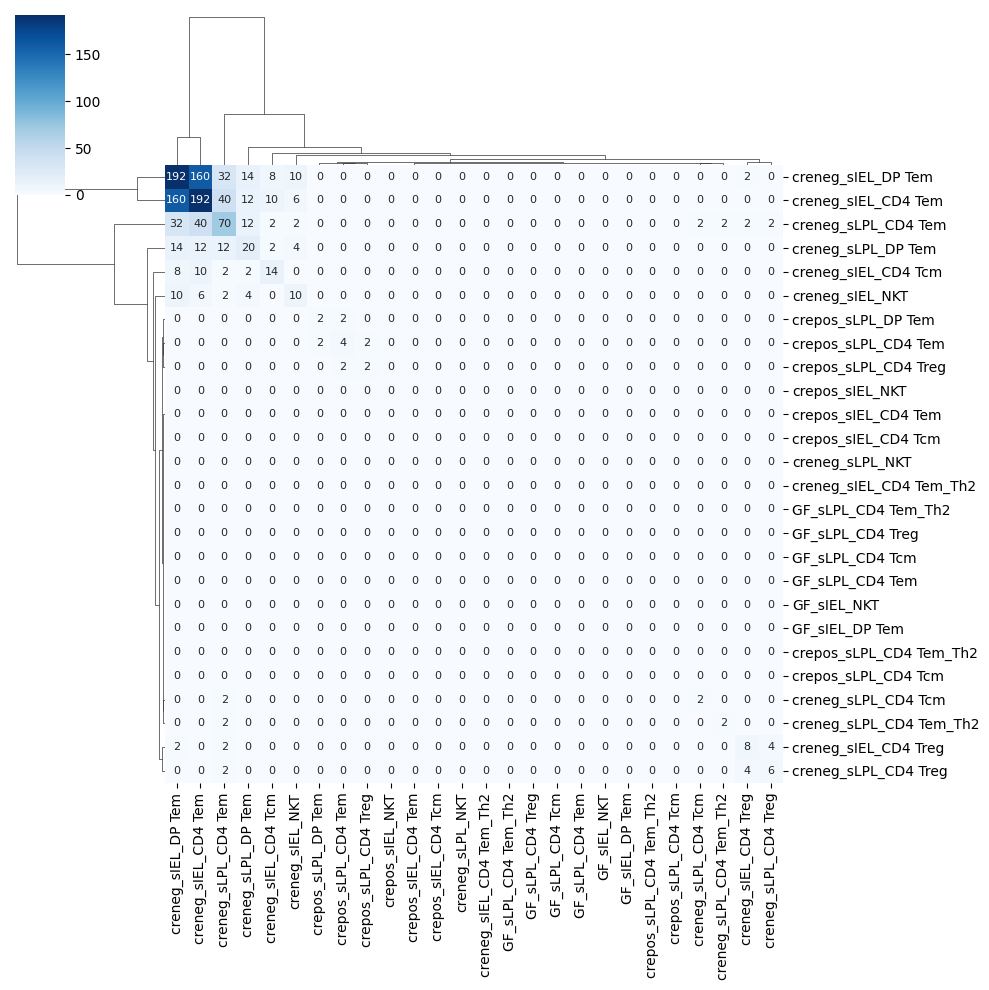

In [15]:
ddl.tl.clone_overlap(tdata, groupby="group_tissue_celltype-fine")
ddl.pl.clone_overlap(
    tdata,
    groupby="group_tissue_celltype-fine",
    weighted_overlap=True,
    as_heatmap=True,
    cmap="Blues",
    annot=True,
    figsize=(10, 10),
    annot_kws={"size": 8},
    fmt="g",
)

In [16]:
# save
tdata.write_h5ad("write/adata_with_tcr_tnk_subset.h5ad", compression="gzip")
vdj.write_h5ddl("write/tcr_data_tnk_subset.h5ddl")

/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_utilities.py:515: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_core.py:1124: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_core.py:1124: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_core.py:1124: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/User